In [1]:
import pandas as pd 
import numpy  as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import torch.nn as nn 
import torch


c:\Users\Vedant\anaconda3\envs\Pytorch_cuda_venv\Lib\site-packages\torch\cuda\__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


In [2]:
device = "cuda"  if torch.cuda.is_available() else "cpu"

### Loading the data 

In [3]:
df = pd.read_csv("ipl_data.csv")

#  Exploratory Data Analysis 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
df["bat_team"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

As we can see here that there are two values in the **bat_team** "Rising Pune Supergiant" and "Rising Pune Supergiants" and "Pune Warriors" which are the end of the day the same  team so we have to replace them with one name 

In [6]:
df["bowl_team"] = df["bowl_team"].replace('Rising Pune Supergiants' ,'Rising Pune Supergiant')
df["bowl_team"] = df["bowl_team"].replace('Pune Warriors' ,'Rising Pune Supergiant')

df["bat_team"] = df["bat_team"].replace('Rising Pune Supergiants' ,'Rising Pune Supergiant')
df["bat_team"] = df["bat_team"].replace('Pune Warriors' ,'Rising Pune Supergiant')

In [7]:
df["bat_team"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiant',
       'Sunrisers Hyderabad', 'Gujarat Lions'], dtype=object)

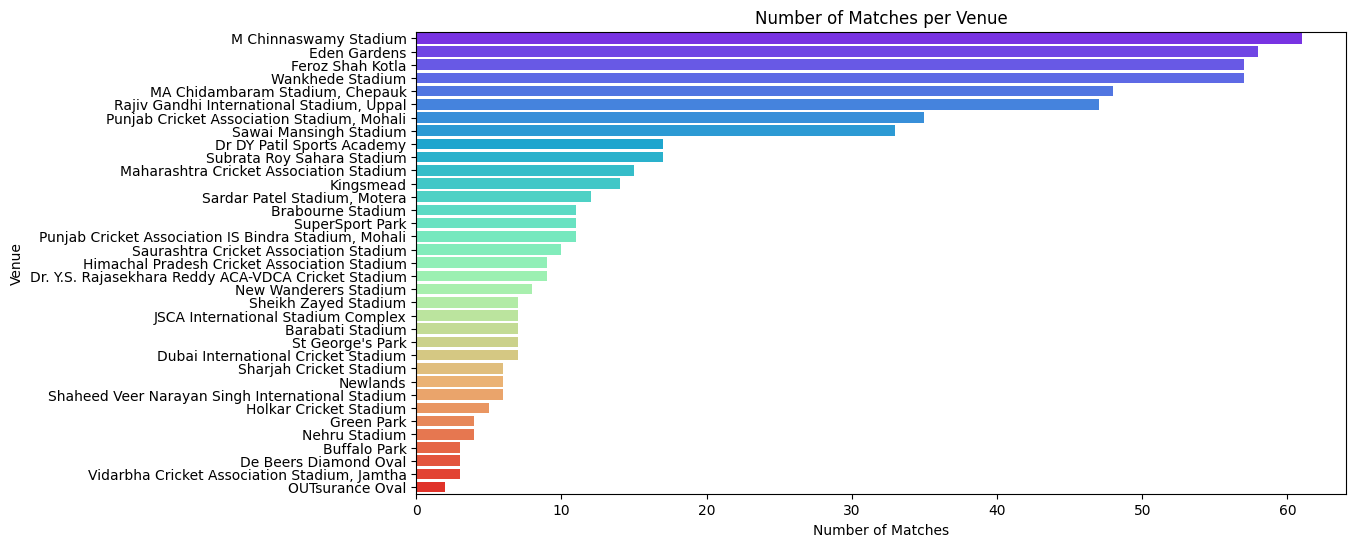

In [8]:
data = df.copy()
matches_per_venue = data[['mid', 'venue']].drop_duplicates()
matches_count = matches_per_venue['venue'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=matches_count.values, y=matches_count.index, palette="rainbow" , hue=matches_count.index)
plt.title('Number of Matches per Venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

Text(0.5, 1.0, 'No. of matches played by top 20 player')

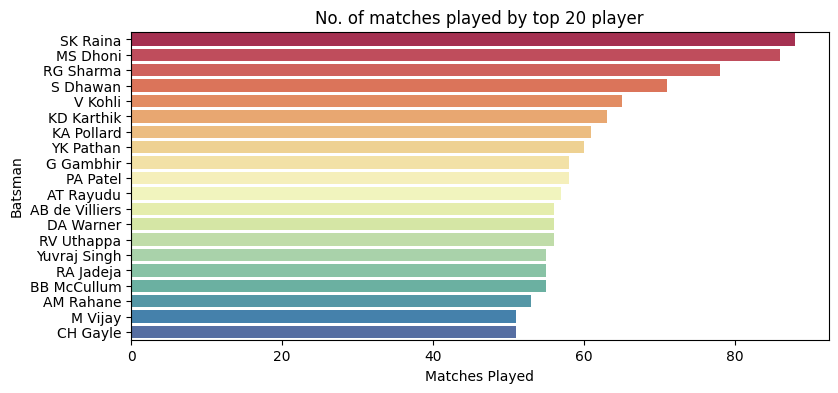

In [9]:
data = df.copy() 
matches_per_batsman = data[['mid' , 'batsman']].drop_duplicates()
count  = matches_per_batsman['batsman'].value_counts()[0:20]


plt.figure(figsize=(9, 4)) 
sns.barplot(x=count.values , y=count.index  , palette="Spectral" , hue=count.index)
plt.xlabel("Matches Played")
plt.ylabel("Batsman")
plt.title("No. of matches played by top 20 player")

Text(0.5, 1.0, 'Runs scored by batsman')

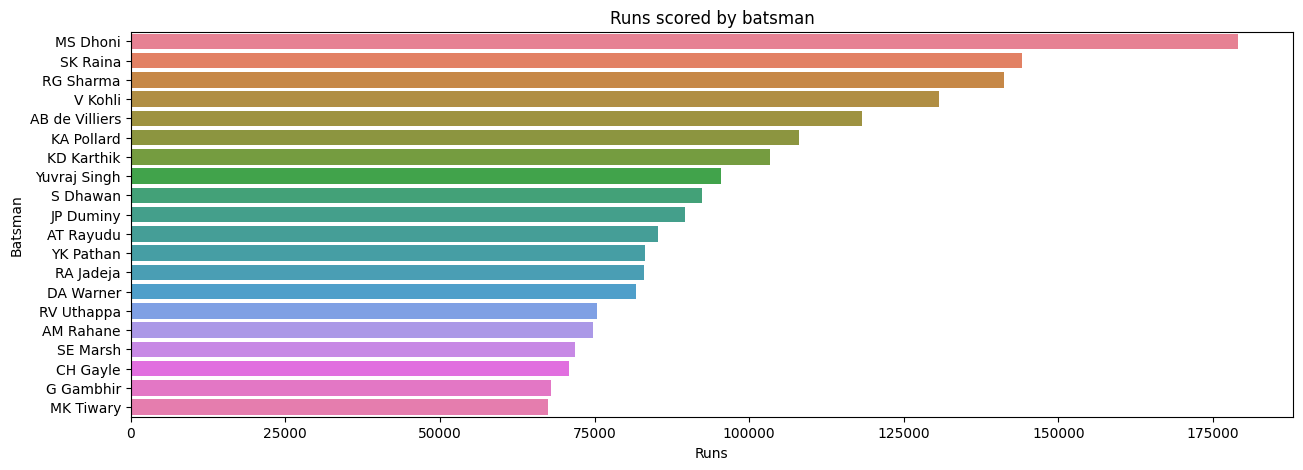

In [10]:
y = {x :df["runs"].where(df["batsman"] == x).sum() for x in df["batsman"].unique() }
y = dict(
    sorted(y.items(), key=lambda x: x[1], reverse=True)
)
plt.figure(figsize=(15,5))
sns.barplot(x= list(y.values())[0:20] , y=list(y.keys())[0:20] , hue=list(y.keys())[0:20] , palette="husl")
plt.xlabel("Runs")
plt.ylabel("Batsman")
plt.title("Runs scored by batsman")

<Axes: xlabel='runs', ylabel='Count'>

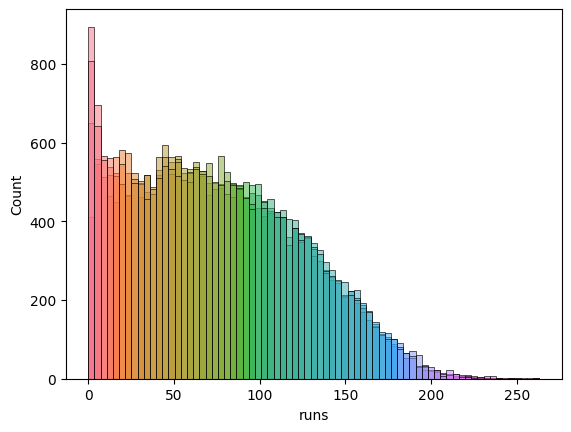

In [11]:
sns.histplot(x="runs" , palette="husl" , data=df , hue="runs" , legend=False)

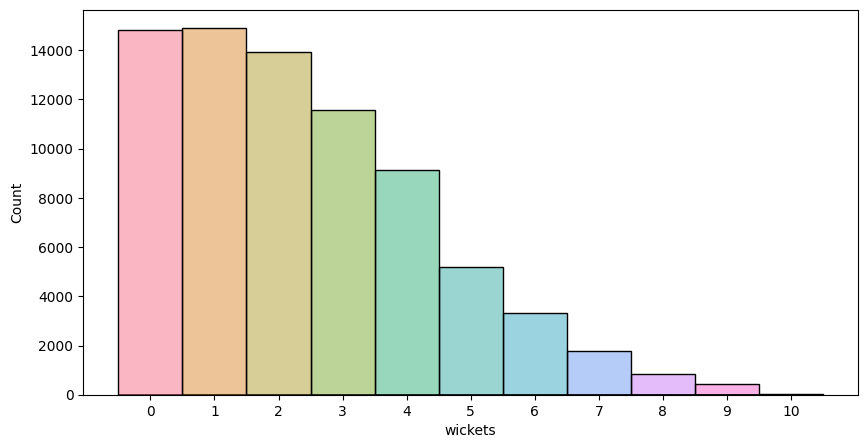

In [12]:
import numpy as np

plt.figure(figsize=(10, 5))
sns.histplot(
    x="wickets",
    bins=np.arange(-0.5, 11.5, 1),
    discrete=True ,
    palette="husl" , 
    data=df , 
    hue = "wickets" , 
    kde=True , 
    legend=False

)
plt.xticks(range(0, 11))
plt.show()



## Feature Engineering 

In [13]:
from sklearn.preprocessing  import LabelEncoder
cat_columns = [x for x in df.columns if df[x].dtype == "O"]
data_encoded = df.copy()
label_encoders = {}
for column in cat_columns :
    le = LabelEncoder() 
    data_encoded[column] = le.fit_transform(df[column])
    label_encoders[column] = le

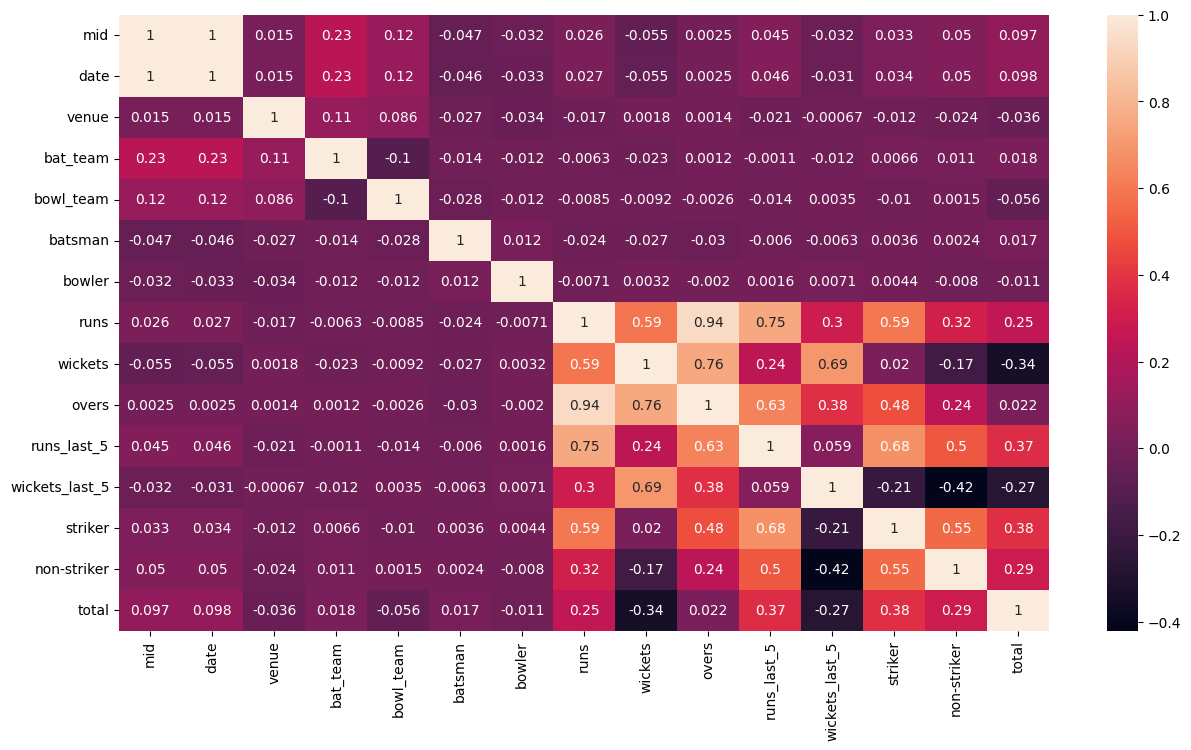

In [14]:
plt.figure(figsize=(15,8))
data_corr = data_encoded.drop(columns=[], axis=1)
sns.heatmap(data_corr.corr(), annot=True)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
feature_cols = ['bat_team', 'bowl_team', 'venue', 'runs',
                'wickets', 'overs', 'striker', 'batsman', 'bowler']

X = data_encoded[feature_cols]
y = data_encoded['total']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X=X_train)
X_test_scaled = scaler.fit_transform(X=X_test)


In [17]:
X_train = torch.tensor(X_train_scaled).to(device)
X_test = torch.tensor(X_test_scaled).to(device)
y_train = torch.tensor(y_train.to_numpy()).to(device)
y_test = torch.tensor(y_test.to_numpy()).to(device)



In [18]:
model = nn.Sequential(nn.Linear(in_features=9,out_features=512) ,
                      nn.ReLU() , 
                      nn.Linear(in_features=512 , out_features=256) , 
                      nn.ReLU() , 
                      nn.Linear(in_features=256 , out_features=128) , 
                      nn.ReLU() , 
                      nn.Linear(in_features=128 ,out_features=1)).to(device=device)

In [19]:
from torch.utils.data  import DataLoader , TensorDataset

train_dataset = TensorDataset(X_train , y_train)
test_dataset = TensorDataset(X_test , y_test)

train_dataloader = DataLoader(dataset=train_dataset , 
                              batch_size=32 ,
                              num_workers=6 ,
                              )
test_dataloader = DataLoader(dataset=test_dataset , 
                              batch_size=32 ,
                              num_workers=0 ,
                              )

In [24]:
## Setting up the loss function and optimizer  and accuracy fn 
from torchmetrics import Accuracy
from sklearn.metrics import accuracy_score

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model.parameters() , lr = 3e-2)



In [25]:
from tqdm import tqdm
import torch

def Train_loop(model, data_loader, optimizer, loss_fn, device, best_loss=float("inf")):
    model.train()
    model.to(device)

    train_loss = 0.0

    for X, y in tqdm(data_loader):
        X, y = X.to(device).float(), y.to(device).float()

        preds = model(X).squeeze()   # regression
        loss = loss_fn(preds, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(data_loader)


    if train_loss < best_loss:
        best_loss = train_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("✅ Best model saved")

    print(f"Train loss: {train_loss:.4f}")
    return best_loss


In [31]:
from sklearn.metrics import mean_absolute_error , r2_score

def Test_loop(model, data_loader, loss_fn, device, max_batches=None):
    model.eval()
    test_loss = 0.0

    all_preds = []
    all_targets = []

    with torch.no_grad():
        for batch_idx, (X, y) in tqdm(enumerate(data_loader)):
            if max_batches is not None and batch_idx >= max_batches:
                break

            X, y = X.to(device).float(), y.to(device).float()

            preds = model(X).squeeze()
            loss = loss_fn(preds, y)

            test_loss += loss.item()

            all_preds.append(preds.cpu())
            all_targets.append(y.cpu())

    all_preds = torch.cat(all_preds)
    all_targets = torch.cat(all_targets)

    test_loss /= (batch_idx + 1)
    mae = mean_absolute_error(all_targets.numpy(), all_preds.numpy())
    r2 = r2_score(all_targets.numpy() , all_preds.numpy())

    print(f"Test loss: {test_loss:.4f} | MAE: {mae:.4f} | R2_score: {r2:.4f}")

    return test_loss, mae , r2


In [29]:
from tqdm import tqdm
 
model.load_state_dict(torch.load("best_model.pth" ,map_location=device))
epochs = 10

for epoch in range(epochs):
    print(f"\nEpoch : {epoch}")

    Train_loop(
        model=model,
        data_loader=train_dataloader,
        optimizer=optimizer,
        loss_fn=loss_fn,
        device=device
    )

    Test_loop(
        model=model,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        device=device,
        max_batches=50
    )



Epoch : 0


100%|██████████| 1663/1663 [00:07<00:00, 212.66it/s]


✅ Best model saved
Train loss: 17788.4199


50it [00:00, 1032.96it/s]


Test loss: 17581.9134 | MAE: 22.9238

Epoch : 1


100%|██████████| 1663/1663 [00:08<00:00, 206.36it/s]


✅ Best model saved
Train loss: 17788.1686


50it [00:00, 1043.36it/s]


Test loss: 17582.3580 | MAE: 24.8659

Epoch : 2


  0%|          | 0/1663 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [32]:
Test_loop(
        model=model,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        device=device,
        
    )

713it [00:00, 1014.52it/s]

Test loss: 17813.4253 | MAE: 25.0728 | R2_score: -0.2038


(17813.425277217742, 25.072813034057617, -0.2037820816040039)